<IPython.core.display.Javascript object>


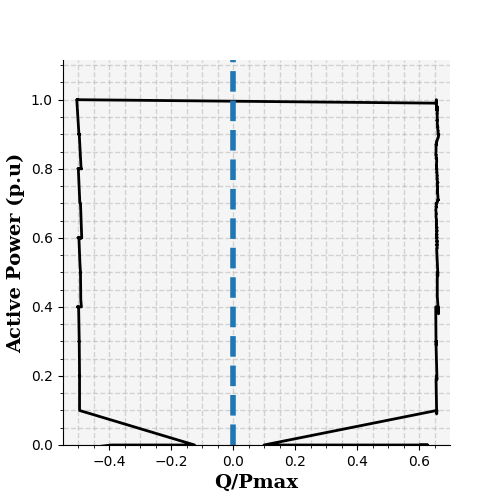

Text(0.5, 0, 'Q/Pmax')

In [11]:
p=[data['P/P'][i] for i in reversed(range(360))]
p=p+data['P/P'][360:].tolist()
q=[data['Q/P'][i] for i in reversed(range(360))]
q=q+data['Q/P'][360:].tolist()
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(q,f,label='V(Q)',linewidth=2,c='k')
# l2 = ax.plot(data['Q/Pmax'],0.85*np.ones(len(data['V(p.u)'])),linewidth=2,c=l1[0].get_color())
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


<IPython.core.display.Javascript object>


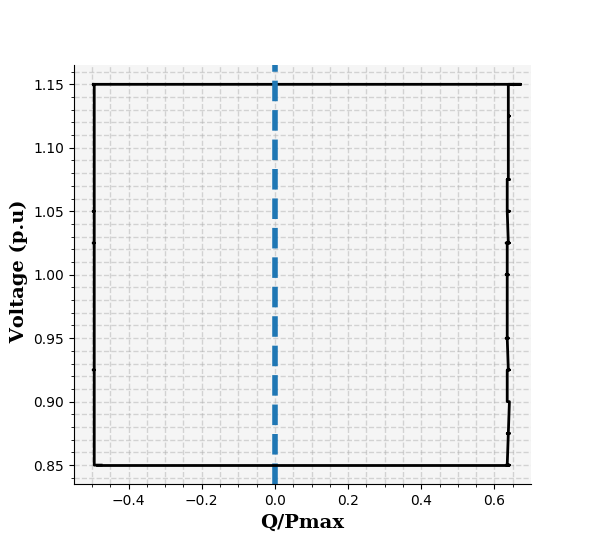

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(data['Q/Pmax'],data['V(p.u)'],label='V(Q)',linewidth=2,c='k')
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=0.85,xmin=0.05,xmax=0.95,linewidth=2, ls='-',c='k')

In [3]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
def custom_plot(x,ys):
    lines=[]
    axes=[]
    fig, ax = plt.subplots(figsize=(10,5))
    axes.append(ax)
    
    for arg in ys:
        if arg["ax2"]==True:
            ax2 = ax.twinx()
            axes.append(ax2)
            break
    i=1
    j=1
    for arg in ys:
        if arg["ax2"]==False:
            l,=ax.plot(x,arg["tr"],label="Y1,"+str(i),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            i+=1
        else:
            l,=ax2.plot(x,arg["tr"],label="Y2,"+str(j),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            j+=1

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=True))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('X Label goes here',fontdict=font)
    ax.set_ylabel('Y1 label goes here',fontdict=font)
    
#     ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.05)
    if j > 1:
        ax2.spines["top"].set_visible(False)
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
        ax2.set_ylabel('Y2 label goes here',fontdict=font)

    labs = [l.get_label() for l in lines]
    leg = axes[0].legend(lines,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lines),prop=legend_font,
                   fancybox=True, shadow=True)
    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        ax2.set_ylim(m,M)
    except:pass

    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        ax.set_ylim(m,M)
    except:pass
    fig.autofmt_xdate()
    return (fig,fig.axes,lines,leg)


Please enter the path of you csv file:/home/spiros/Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


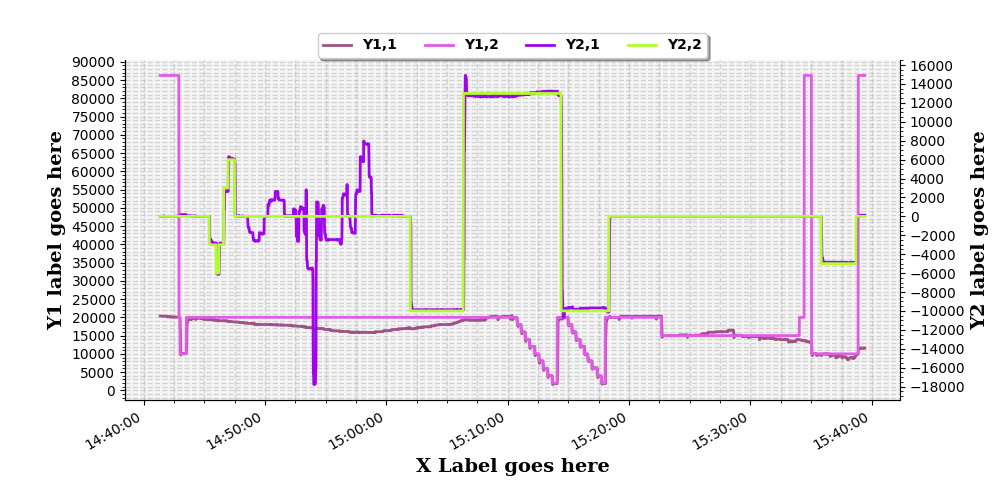

7

In [71]:
%matplotlib notebook
y1={"tr":m['P'].iloc[:,0],"ax2":False}
y2={"tr":s['P'].iloc[:,0],"ax2":False}
y3={"tr":m['Q'].iloc[:,0],"ax2":True}
y4={"tr":s['Q'].iloc[:,0],"ax2":True}
fig,axes,lines,leg=custom_plot(time,[y1,y2,y3,y4])


annots = []
for ax in axes:
    annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",bbox=dict(boxstyle="round", fc="w"))
    annot.set_visible(False)
    annots.append(annot)

    
annot_dic = dict(zip(axes, annots))
# line_dic = dict(zip(axes, lines))

def update_annot(l,annot,ind):
    x,y = l.get_data()
    xc = x[ind["ind"][0]]
    yc = y[ind["ind"][0]]
    annot.xy = (xc, yc)
    text = "({},{})".format(str(xc).split("T")[1].split(".")[0],yc)
    annot.set_text(text)
            
def hover(event):
#     vis = annot.get_visible()
    if event.inaxes in axes:
        for ax in axes:
            for line in ax.lines:
                cont, ind = line.contains(event)
                annot = annot_dic[ax]
                if cont:
                    update_annot(line, annot, ind)
                    annot.set_visible(True)
                    fig.canvas.draw_idle()
                    break
                else:
                    if annot.get_visible():
                        annot.set_visible(False)
                        fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)


In [69]:
annot_dic

{<matplotlib.axes._subplots.AxesSubplot at 0x7fb2cd0e3eb8>: Text(-20, 20, '')}

In [64]:
axes[0].lines

In [49]:
datetime.datetime.strptime(t, '%H:%M:%S')

TypeError: strptime() argument 1 must be str, not numpy.datetime64

In [52]:
str(t).split("T")[1].split(".")[0]

'14:41:22'

<IPython.core.display.Javascript object>


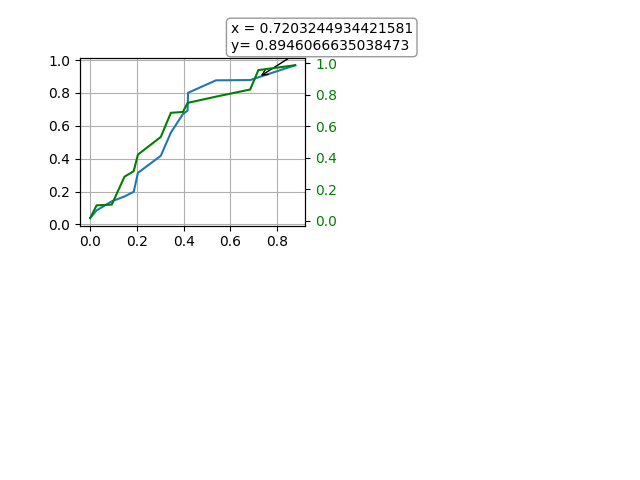

In [55]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.sort(np.random.rand(15))
y = np.sort(np.random.rand(15))
y2 = np.sort(np.random.rand(15))

fig = plt.figure()
ax1 = plt.subplot(2, 2, 1)
line1, = plt.plot(x,y)
ax1.grid(True)

ax2 = ax1.twinx()
line2, = ax2.plot(x, y2, color='green')
ax2.tick_params(axis='y', labelcolor='green')

annots = []
for ax in [ax1, ax2]:
    annot = ax1.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w", alpha=0.4),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    annots.append(annot)

annot_dic = dict(zip([ax1, ax2], annots))
line_dic = dict(zip([ax1, ax2], [line1, line2]))

def update_annot(line, annot, ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "x = {}\ny= {}".format(x[ind["ind"][0]], y[ind["ind"][0]])
    annot.set_text(text)

def hover(event):

    if event.inaxes in [ax1, ax2]:
        for ax in [ax1, ax2]:
            cont, ind = line_dic[ax].contains(event)
            annot = annot_dic[ax]
            if cont:
                update_annot(line_dic[ax], annot, ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if annot.get_visible():
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()